<a href="https://colab.research.google.com/github/MauricioCastroF/VC1_EntregaTP/blob/main/TP1_PARTE_2_2_Castro_FrancoMauricio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I.git
!cd vision_computadora_I && git checkout 8va-cohorte

Cloning into 'vision_computadora_I'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 523 (delta 7), reused 32 (delta 7), pack-reused 488
Receiving objects: 100% (523/523), 156.95 MiB | 24.64 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Updating files: 100% (110/110), done.
Branch '8va-cohorte' set up to track remote branch '8va-cohorte' from 'origin'.
Switched to a new branch '8va-cohorte'


In [ ]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
cd vision_computadora_I/Material_TPs/TP1

/content/vision_computadora_I/Material_TPs/TP1


In [114]:
seg = cv.imread('segmentacion.png')
seg2 = cv.cvtColor(seg, cv.COLOR_BGR2RGB)

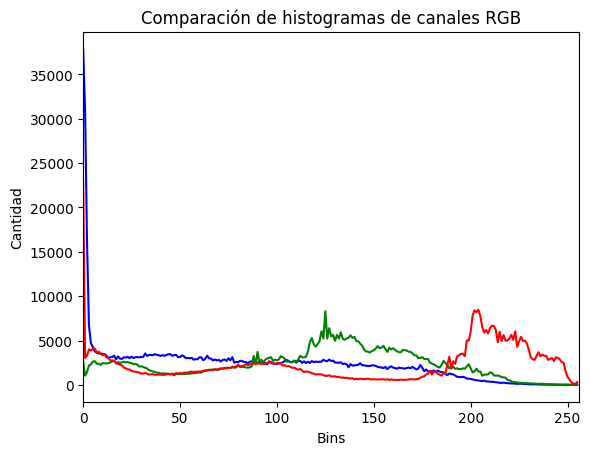

In [115]:
canales = cv.split(seg2); colors = ("b", "g", "r")
plt.figure()
plt.title("Comparación de histogramas de canales RGB")
plt.xlabel("Bins")
plt.ylabel("Cantidad")

for (canales, color) in zip(canales, colors):
	# generar un histograma para cada canal de la imagen RGB
	hist = cv.calcHist([canales], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

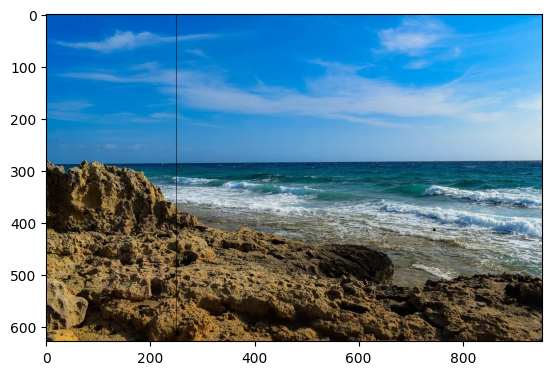

In [116]:
img_anotada = seg2.copy()
img_anotada[:, 250]=0
plt.figure()
plt.imshow(img_anotada,cmap='gray')
plt.show()

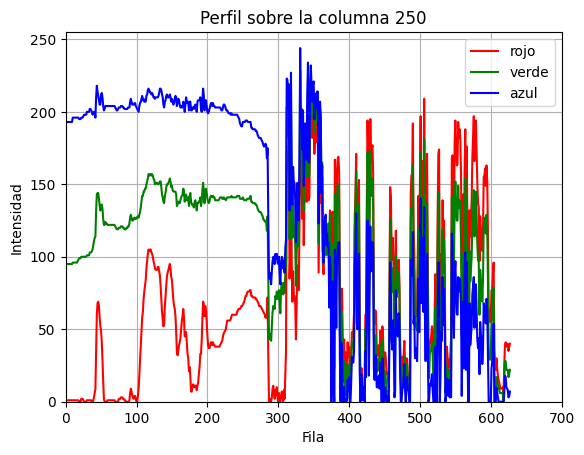

In [117]:
idx_col = 250
perfil_color = seg2[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='rojo')
plt.plot(perfil_color[:,1], color='g',label='verde')
plt.plot(perfil_color[:,2], color='b',label='azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,700)
plt.ylim(0,255)
plt.legend()
plt.show()

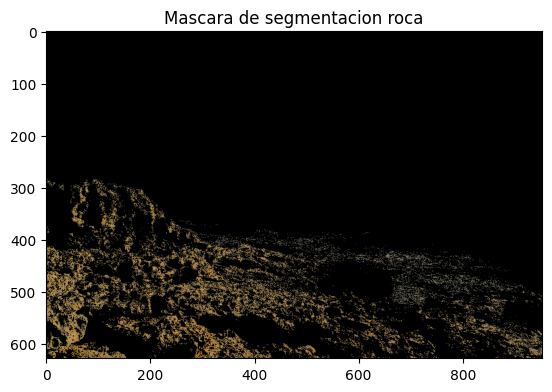

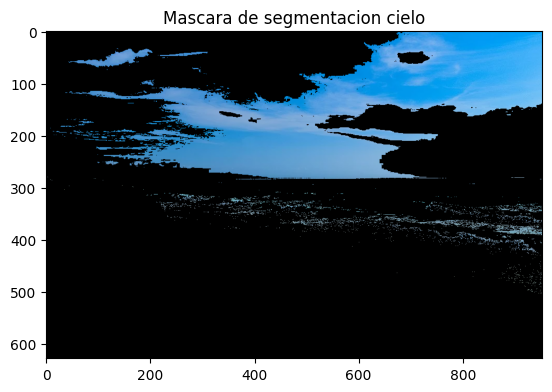

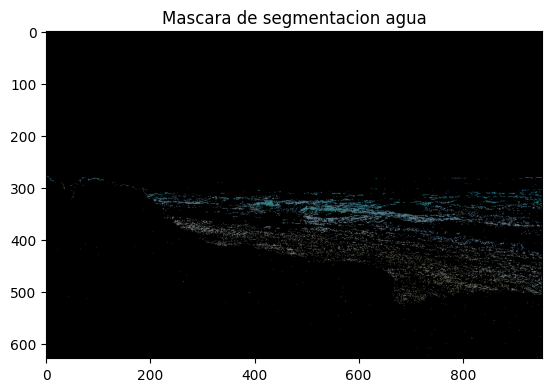

In [118]:
lim_r1 = np.array([100,100,0])
lim_r2 = np.array([200,200,100])

lim_g1 = np.array([0,140,0])
lim_g2 = np.array([130,255,255])

lim_b1 = np.array([10,110,0])
lim_b2 = np.array([120,250,150])

##Segmentar roca
mask_roca = cv.inRange(seg2, lim_r1, lim_r2)
seg_roca = cv.bitwise_and(seg2, seg2, mask=mask_roca)

plt.figure()
plt.title('Mascara de segmentacion roca')
plt.imshow(seg_roca)
plt.show()

##Segmentar cielo
mask_cielo = cv.inRange(seg2, lim_g1, lim_g2)
seg_cielo = cv.bitwise_and(seg2, seg2, mask=mask_cielo)

plt.figure()
plt.title('Mascara de segmentacion cielo')
plt.imshow(seg_cielo)
plt.show()

##Segmentar agua
mask_agua = cv.inRange(seg2, lim_b1, lim_b2)
seg_agua = cv.bitwise_and(seg2, seg2, mask=mask_agua)

plt.figure()
plt.title('Mascara de segmentacion agua')
plt.imshow(seg_agua)
plt.show()